# Analyzing Video Game Sales, by Andy Qu and Evan Song

~ wonderful prose ~

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('vgsales-12-4-2019.csv')

In [73]:
# Relationship between Publisher and sales/shipped

In [74]:
# Because sales are either listed under "Total_Shipped" or "Global_Sales", 
# Total_Sales will keep the total value in one column. Records by Millions.
# Then removes games with no sales data whatsoever.
df['Total_Sales'] = df.Total_Shipped.fillna(0) + df.Global_Sales.fillna(0)
df = df[df.Total_Sales != 0]


In [75]:
>>> df["Publisher_Sales"] = df.groupby(["Publisher"])["Total_Sales"].transform(sum)
df = df.sort_values(by=['Publisher_Sales', 'Total_Sales'], ascending=False)

In [76]:
# number of games made, including repeats across platforms. 
# Used to divide by Publisher sales to see average sales per game
games_per_publisher = df['Publisher'].value_counts().to_dict()

In [119]:
df['Avg_Sale'] = 0
df['Games_Produced'] = 0
for index, row in df.iterrows():
    sales = row['Publisher_Sales']
    games = games_per_publisher[row['Publisher']]
    avg = sales/games
    
    df.loc[index, 'Games_Produced'] = games
    df.loc[index, 'Avg_Sale'] = avg

In [120]:
# df.sort_values(by=['Avg_Sale', 'Total_Sales'], ascending=False).head(50)

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Total_Sales,Publisher_Sales,Avg_Sale,Games_Produced
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0,36.60,36.60,36.600000,1
101,102,Rust,Action-Adventure,NaN,PC,Facepunch Studios,Facepunch Studios,6.1,NaN,9.15,NaN,NaN,NaN,NaN,NaN,2018.0,9.15,9.15,9.150000,1
224,225,The Forest,Misc,NaN,PC,Endnight Games Ltd,Unknown,NaN,NaN,5.30,NaN,NaN,NaN,NaN,NaN,2014.0,5.30,5.30,5.300000,1
266,267,Stardew Valley,Simulation,E10,PC,Chucklefish,ConcernedApe,9.2,NaN,4.91,NaN,NaN,NaN,NaN,NaN,2016.0,4.91,4.91,4.910000,1
304,305,Riven: The Sequel to Myst,Adventure,E,PC,Red Orb,Cyan Worlds,NaN,NaN,4.50,NaN,NaN,NaN,NaN,NaN,1997.0,4.50,4.50,4.500000,1
55,56,Portal 2,Shooter,E10,PC,Valve,Valve Software,9.7,NaN,13.06,NaN,NaN,NaN,NaN,NaN,2011.0,13.06,17.21,4.302500,4
953,954,Portal 2,Shooter,E10,X360,Valve,Valve Software,9.6,NaN,NaN,2.08,1.41,0.49,0.01,0.17,2011.0,2.08,17.21,4.302500,4
1236,1237,Portal 2,Shooter,E10,PS3,Valve,Valve Software,9.6,NaN,NaN,1.71,0.83,0.62,0.02,0.24,2011.0,1.71,17.21,4.302500,4
5931,5932,Left 4 Dead 2,Shooter,M,PC,Valve,Certain Affinity / Valve Software,9.0,NaN,NaN,0.36,NaN,0.32,NaN,0.04,2009.0,0.36,17.21,4.302500,4
341,342,7 Days to Die,Action,M,PC,The Fun Pimps,The Fun Pimps,NaN,NaN,4.18,NaN,NaN,NaN,NaN,NaN,2013.0,4.18,4.18,4.180000,1


## Measuring by Publisher Average
Publisher average sales are not a good indicator of how well a game will sell.
A lot of the top results show Publishers that have published single titles or only have a single top title.

In [149]:
# Remove PUBG and Nintendo because they're extreme outliers
# PUBG has a too high avg_sale value, Nintendo too high games produced value
pubavg_df = df[df.Name != "PlayerUnknown's Battlegrounds"]
pubavg_df = pubavg_df[pubavg_df.Publisher != 'Nintendo']
pubavg_df = pubavg_df.sort_values(by=['Avg_Sale', 'Total_Sales'], ascending=False)
pubavg_df = pubavg_df.drop_duplicates(subset='Publisher', keep="last")
# pubavg_df.head(40)

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Total_Sales,Publisher_Sales,Avg_Sale,Games_Produced
101,102,Rust,Action-Adventure,NaN,PC,Facepunch Studios,Facepunch Studios,6.1,NaN,9.15,NaN,NaN,NaN,NaN,NaN,2018.0,9.15,9.15,9.150000,1
224,225,The Forest,Misc,NaN,PC,Endnight Games Ltd,Unknown,NaN,NaN,5.30,NaN,NaN,NaN,NaN,NaN,2014.0,5.30,5.30,5.300000,1
266,267,Stardew Valley,Simulation,E10,PC,Chucklefish,ConcernedApe,9.2,NaN,4.91,NaN,NaN,NaN,NaN,NaN,2016.0,4.91,4.91,4.910000,1
304,305,Riven: The Sequel to Myst,Adventure,E,PC,Red Orb,Cyan Worlds,NaN,NaN,4.50,NaN,NaN,NaN,NaN,NaN,1997.0,4.50,4.50,4.500000,1
5931,5932,Left 4 Dead 2,Shooter,M,PC,Valve,Certain Affinity / Valve Software,9.0,NaN,NaN,0.36,NaN,0.32,NaN,0.04,2009.0,0.36,17.21,4.302500,4
341,342,7 Days to Die,Action,M,PC,The Fun Pimps,The Fun Pimps,NaN,NaN,4.18,NaN,NaN,NaN,NaN,NaN,2013.0,4.18,4.18,4.180000,1
14004,14005,Minecraft: Story Mode,Adventure,E10,WiiU,Mojang,Telltale Games,NaN,NaN,NaN,0.07,0.04,0.03,NaN,0.01,2016.0,0.07,37.52,4.168889,9
7766,7767,The Basement Collection,Adventure,NaN,PC,Edmund McMillen,Edmund McMillen,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,2012.0,0.25,7.42,3.710000,2
2153,2154,Lode Runner,Puzzle,NaN,NES,Broderbund,Hudson Soft,NaN,NaN,NaN,1.10,NaN,NaN,1.10,0.00,1987.0,1.10,7.10,3.550000,2
17602,17603,Left 4 Dead,Shooter,M,PC,Valve Corporation,Valve Software,8.6,8.5,NaN,0.02,NaN,0.02,NaN,0.00,2008.0,0.02,14.11,3.527500,4


In [150]:
X = pubavg_df.head(50)['Publisher']
Y1 = pubavg_df.head(50)['Avg_Sale']
Y2 = pubavg_df.head(50)['Games_Produced']

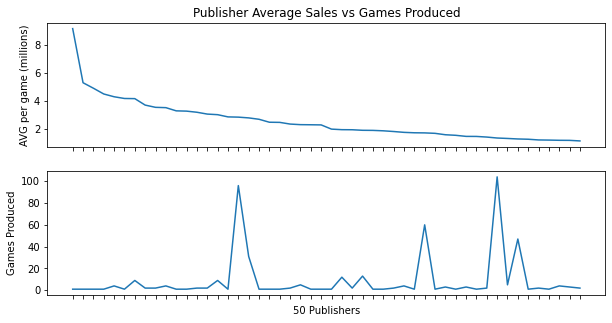

In [166]:
# plt.figure(figsize=(12, 8), dpi=80)
fig, axes = plt.subplots(2, figsize=(10, 5), sharex = True)
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
ax1.set_ylabel("AVG per game (millions)")
ax2.set_ylabel("Games Produced")
ax2.set_xlabel("50 Publishers")
ax1.set_xticklabels("")
ax2.set_xticklabels("")
ax1.plot(X, Y1)
ax2.plot(X, Y2)
# plt.xlabel("Publishers")
ax1.set_title("Publisher Average Sales vs Games Produced")

# plt.plot(X, Y1)
# plt.plot(X, Y2)
# ax.legend(loc='upper center', b)
plt.show()
